In [4]:
suppressMessages(library(ggplot2))
withr::with_makevars(c(PKG_LIBS="-liconv"), install.packages("readxl"), assignment="+=")
suppressMessages(library(readxl))


ERROR: Error in library(readxl): there is no package called ‘readxl’


# Class Lab #2 

Room temperature data from VAV locations 3-06 and 4-06 were collected for the 1st half of 2017 and are contained in file “VAV 3-06 4-06 1stHalf_stacked.xlsx”. (An unstacked version of the data is contained in file “VAV 3-06 4-06 1stHalf.xlsx”.) The question was asked as to whether the mean temperatures from the two locations were the same or not since they represented data from identical locations except for different floors. 

1.	Use histograms, plots and boxplots to visually compare the locations. What visual comparisons can you make?
2.	Test the hypothesis that the means are the same using the two sample t-test procedure and your software of choice. (Variances appear to be the same)
3.	Create a confidence interval for the mean difference and check to see that it aligns with your test result in c.
4.	Using the data in “VAV 3-06 4-06 1stHalf.xlsx”, test the hypothesis that the means are the same using a paired comparison approach. 


In [2]:
lab2 <- read_xlsx('../Datasets/VAV 3-06 4-06 1stHalf_stacked.xlsx')
head(lab2)

ERROR: Error in read_xlsx("../Datasets/VAV 3-06 4-06 1stHalf_stacked.xlsx"): could not find function "read_xlsx"


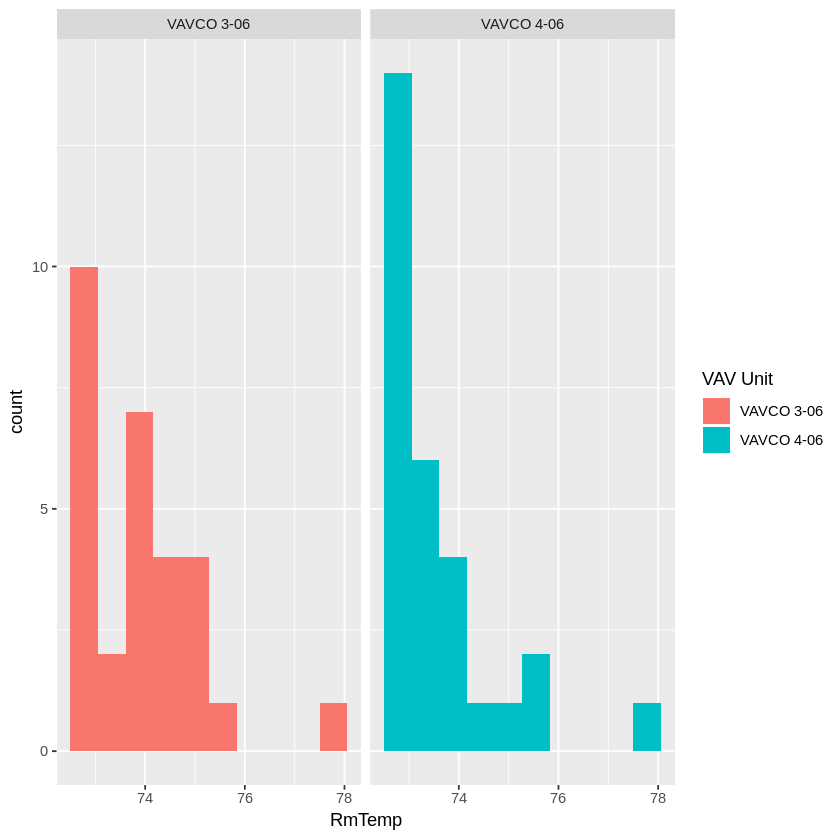

In [3]:
# Use histograms, plots and boxplots to visually compare the locations
# Histograms
ggplot(lab2, aes(RmTemp)) + geom_histogram(aes(fill=`VAV Unit`), bins=10) + facet_grid(. ~ `VAV Unit`)

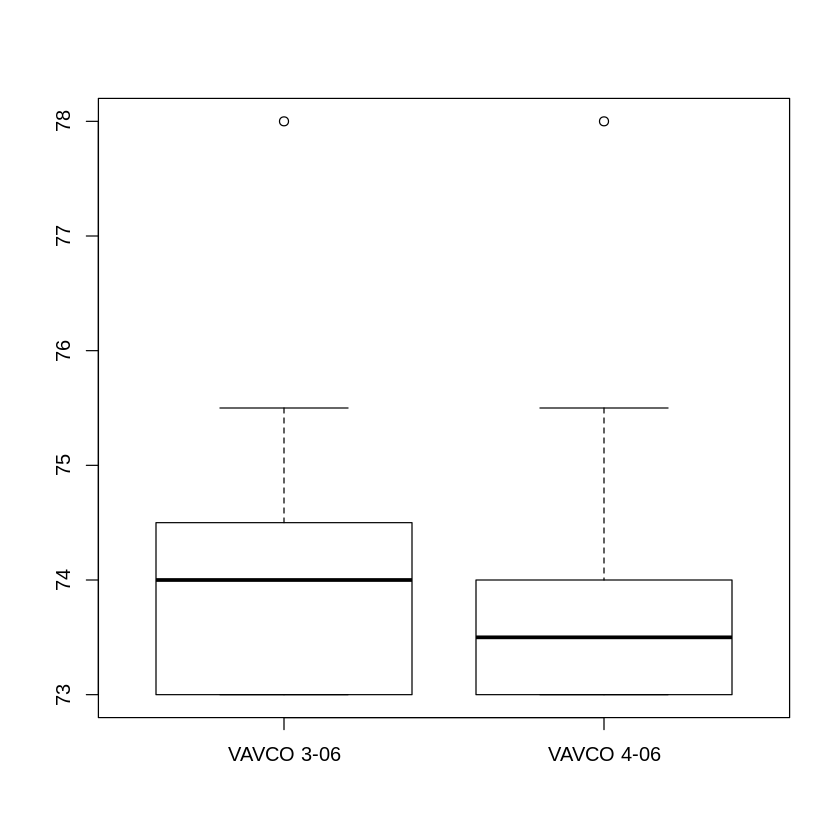

In [4]:
# Use histograms, plots and boxplots to visually compare the locations
# Boxplots
boxplot(RmTemp ~ `VAV Unit`, data = lab2)

In [5]:
# Test the hypothesis that the means are the same using the two sample t-test procedure and your software of choice. 
# (Variances appear to be the same)

VAV306 <- lab2$`VAV Unit` == 'VAVCO 3-06' # Select rows for VAVCO 3-06
VAV406 <- lab2$`VAV Unit` == 'VAVCO 4-06' # Select rows for VAVCO 4-06

t.test(lab2[VAV306,]$RmTemp, lab2[VAV406,]$RmTemp, var.equal = T)


	Two Sample t-test

data:  lab2[VAV306, ]$RmTemp and lab2[VAV406, ]$RmTemp
t = 1.0685, df = 56, p-value = 0.2899
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2714909  0.8921806
sample estimates:
mean of x mean of y 
 74.01724  73.70690 


In [6]:
# Create a confidence interval for the mean difference and check to see that it aligns with your test result in c
diff <- lab2[VAV306,]$RmTemp - lab2[VAV406,]$RmTemp
t.test(diff)


	One Sample t-test

data:  diff
t = 3.4148, df = 28, p-value = 0.001966
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.1241794 0.4965103
sample estimates:
mean of x 
0.3103448 


In [7]:
# Using the data in “VAV 3-06 4-06 1stHalf.xlsx”, test the hypothesis that the means are the same using 
# a paired comparison approach. 

t.test(lab2[VAV306,]$RmTemp, lab2[VAV406,]$RmTemp, var.equal = T, paired = T)


	Paired t-test

data:  lab2[VAV306, ]$RmTemp and lab2[VAV406, ]$RmTemp
t = 3.4148, df = 28, p-value = 0.001966
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1241794 0.4965103
sample estimates:
mean of the differences 
              0.3103448 
